# Assignment 6

# 1.1 importing necessary packages

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

# 1.2 Loading dataset

## adding a new feature for feature engineering which is feature 13 

In [2]:
X = load_boston().data
Y = load_boston().target
df=pd.DataFrame(X)
# adding a new feature because feauture 10 represents the Median value of owner-occupied homes in $1000's and feature 12 represents he proportion of blacks by town 
df[13]=df[10]//df[12]  #here we set a column 13 such that df[13]=Boston_data['Medv']//Boston_data['B']
X=df.as_matrix()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,3.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,4.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,6.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,3.0


In [17]:
# Standardizing all numerical features

In [3]:
#Splitting whole data into train and test
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.33, random_state=7)

# applying column standardization on train and test data

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

df_train=pd.DataFrame(X_train)
df_train['price']=y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,price
0,-0.434509,2.569022,-1.267370,-0.282166,-1.340054,0.102435,-1.751328,1.935397,-0.474174,-0.253558,-1.649552,0.077328,-1.079907,0.408108,22.5
1,-0.435461,-0.477752,-1.235724,-0.282166,-0.564048,0.980322,-0.382070,-0.449103,-0.709354,-1.244803,-0.274700,0.424886,-1.070356,1.194179,37.2
2,1.455745,-0.477752,1.014046,-0.282166,1.658151,-0.464389,0.672580,-0.930124,1.760030,1.596768,0.825181,-3.552132,2.883877,-1.164035,8.4
3,-0.436571,0.436280,-0.778290,-0.282166,-0.996142,-0.377292,-1.704852,1.452134,-0.591764,-0.944426,-0.732984,0.424886,-0.607801,-0.377963,23.4
4,0.766851,-0.477752,1.014046,-0.282166,1.243693,0.276630,1.062264,-0.975393,1.760030,1.596768,0.825181,0.365221,0.577923,-0.377963,13.1


# 1.3 SGD implementation for linear regression
- function having parameter X_train,y_train,no of iteration,learning rate r
- intialising no of iteration=1000,learning rate =0.01
- batch size=32

In [5]:

# batch_size should be selected as a multiple of 2 for good results


W,B,iteration,lr_rate,k=np.random.randn(1,14),0,1000,0.01,32 #intialise W to random no and B to zero

while iteration>=0:
    w,b,temp_vectors,temp_intercept=W,B,np.zeros(shape=(1,14)),0
    data=df_train.sample(32) #sampling random k=batch size=32 data
    x=np.array(data.drop('price',axis=1))
    y=np.array(data['price'])
    
    for i in range(k):
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        
    W=(w-lr_rate*(temp_vectors)/k)
    B=(b-lr_rate*(temp_intercept)/k)
    
    iteration-=1
    
    
    
print(W)
print(B)

[[-1.06376104  0.31049954 -0.29369134  0.54904567 -1.67674344  2.97486592
   0.06973423 -2.60088026  1.787087   -1.12082982 -2.46390053  0.67676598
  -0.63292549  3.23570847]]
[22.59734909]


In [6]:
#prediction on x_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic_lr=[]
for i in range(len(X_test)):
    val=np.dot(W,X_test[i])+B  #val= wTx+b
    y_predic_lr.append(np.asscalar(val))

# Scatter plot of manual SGD implementation

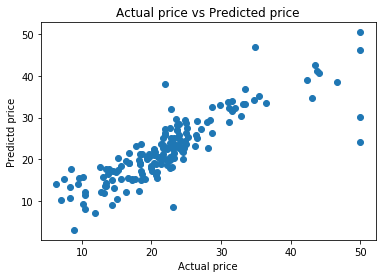

In [7]:
#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_predic_lr)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [8]:
MSE_lr=mean_squared_error(y_test,y_predic_lr)
print('mean squared error =',MSE_lr)

mean squared error = 20.290469323888228


# 1.5 Scatterplot of sklearn SGD

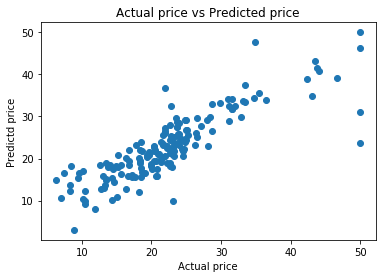

In [11]:
#SGD regression sklearn implementation

#intialising no of iteration=1000,eta0=1
#taking t=2 and power_t=1 such that for each iteration eta0=eta0/pow(2,1) ,it means half each times

model=SGDRegressor(learning_rate='constant',eta0=0.01,penalty=None,max_iter=1000)
model.fit(X_train,y_train)
y_pred_sgd=model.predict(X_test)

#Scatter plot of actual price vs predicted price

plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

# Explanation

- We observe the scatterplots of both manual implemention as well as sklearn SGD give almost similar plots

- It implies manual implementation is almost correct

In [12]:
MSE_sgd=mean_squared_error(y_test,y_pred_sgd)
print('mean squared error =',MSE_sgd)

mean squared error = 20.874879169535497


In [25]:

# Comparing weights of two implementations
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['Weight vector of  manual SGD','Weight vector of SGD sklearn']
weight_sgd=model.coef_
for i in range(13):
    x.add_row([W[0][i],weight_sgd[i]])
print(x)

+------------------------------+------------------------------+
| Weight vector of  manual SGD | Weight vector of SGD sklearn |
+------------------------------+------------------------------+
|     -1.0637610418383168      |     -1.2102669406105764      |
|      0.3104995415747905      |     0.16492965830786752      |
|     -0.29369133922081336     |     -0.3152219947428299      |
|      0.549045666598545       |     0.28006128032896843      |
|     -1.6767434379586952      |     -1.7182269873531635      |
|      2.974865920224037       |      2.7945077844582427      |
|     0.06973422979094325      |    9.298135371791543e-05     |
|      -2.600880260417682      |      -2.691161025332599      |
|      1.7870869985271018      |      2.0752309264734548      |
|     -1.1208298245761101      |      -1.41252292288952       |
|     -2.4639005262277456      |      -2.601583342104059      |
|      0.6767659847794245      |     0.47285396370479016      |
|     -0.6329254893449336      |     -0.

In [24]:

#comparison between MSE of own implementation and SGD sklearn implementation
print('Mean Square error of manual implementation = ',MSE_lr)
print('-'*50)
print('Mean square error of SGD sklearn implementation = ',MSE_sgd)

Mean Square error of manual implementation =  20.290469323888228
--------------------------------------------------
Mean square error of SGD sklearn implementation =  20.874879169535497


In [16]:
z= PrettyTable()
z.field_names=['MSE of manual implementation',"MSE of SGD sklearn"]
z.add_row([20.29,20.87])
print(z)

+------------------------------+--------------------+
| MSE of manual implementation | MSE of SGD sklearn |
+------------------------------+--------------------+
|            20.29             |       20.87        |
+------------------------------+--------------------+


# Conclusion

- We observe that weight vectors of manual implementation and sklearns SGD implementation nearly give same values for the Boston dataset
- MSE of manual implementation was 20.29 and that of Sklearn was 20.87